<a href="https://colab.research.google.com/github/Bhaktaraj-Pooja/ML-Project/blob/main/Case4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing dataset into python**

In [1]:
## First Step - Import train.csv (Case 4 - Work life balance)

## inporting necessary libraries:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
csvdata = pd.read_csv("/content/train.csv")

In [ ]:
csvdata.shape

(22750, 12)

In [ ]:
csvdata.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Age', 'Tenure', 'Vacations taken',
       'Designation', 'Average Hours worked per day',
       'Employee satisfaction score', 'Mental Fatigue Score'],
      dtype='object')

In [42]:
csvdata.dtypes

Employee ID                      object
Date of Joining                  object
Gender                           object
Company Type                     object
WFH Setup Available              object
Age                               int64
Tenure                            int64
Vacations taken                   int64
Designation                       int64
Average Hours worked per day    float64
Employee satisfaction score     float64
Mental Fatigue Score            float64
dtype: object

# Displaying some rows from the begining of dataset

In [6]:
csvdata.head(25)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,44,8,10,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,62,16,11,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,31,16,6,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,23,15,9,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,27,1,2,3,6.0,NaN,0.67


# **Data Preprocessing**

In [15]:
newframe = csvdata.rename(columns = {'Employee ID': 'Emd_ID',	'Date of Joining': 'Join_date',	'Company Type': 'Comp_type',	'WFH Setup Available': 'WFH',	'Vacations taken': 'Vacation',	'Designation': 'Desig',	'Average Hours worked per day': 'work_hours','Employee satisfaction score': 'Satisfaction', 'Mental Fatigue Score': 'Fatigue'}, inplace = False )
print(newframe)

                         Emd_ID   Join_date  ... Satisfaction Fatigue
0      fffe32003000360033003200  2008-09-30  ...          3.8    0.16
1          fffe3700360033003500  2008-11-30  ...          5.0    0.36
2      fffe31003300320037003900  2008-03-10  ...          5.8    0.49
3      fffe32003400380032003900  2008-11-03  ...          2.6    0.20
4      fffe31003900340031003600  2008-07-24  ...          6.9    0.52
...                         ...         ...  ...          ...     ...
22745  fffe31003500370039003100  2008-12-30  ...          NaN    0.41
22746  fffe33003000350031003800  2008-01-19  ...          6.7    0.59
22747          fffe390032003000  2008-11-05  ...          NaN    0.72
22748  fffe33003300320036003900  2008-01-10  ...          5.9    0.52
22749      fffe3400350031003800  2008-01-06  ...          7.8    0.61

[22750 rows x 12 columns]


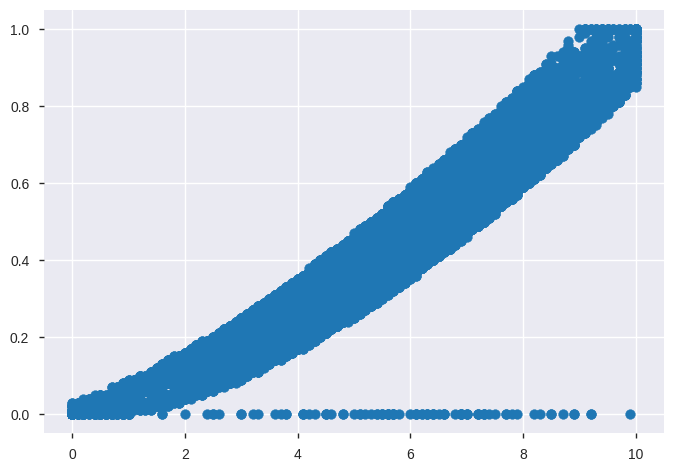

In [16]:
plt.scatter(newframe.Satisfaction, newframe.Fatigue)

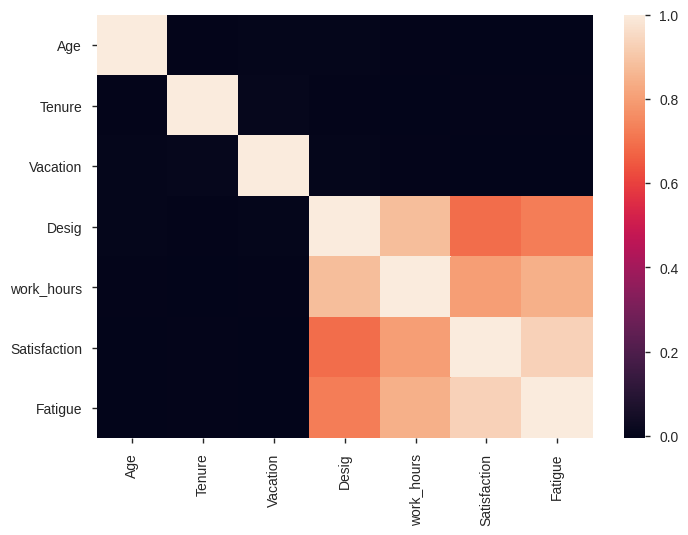

In [19]:
import seaborn as sns

newframe_numeric = newframe[['Age', 'Tenure', 'Vacation', 'Desig', 'work_hours', 'Satisfaction', 'Fatigue']]
data_corr = newframe_numeric.corr()
sns.heatmap(data_corr, xticklabels= data_corr.columns, yticklabels= data_corr.columns)

**Using Pandas Profiling for checking nature of dataset**

In [48]:
import pandas_profiling

newframe.columns

data_rep = newframe[['Emd_ID', 'Gender', 'Comp_type', 'WFH', 'Age', 'Tenure', 'Vacation', 'Desig', 'work_hours', 'Satisfaction', 'Fatigue']]

data_rep.dtypes

Emd_ID           object
Gender           object
Comp_type        object
WFH              object
Age               int64
Tenure            int64
Vacation          int64
Desig             int64
work_hours      float64
Satisfaction    float64
Fatigue         float64
dtype: object